### Splitting the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [1]:
import pandas as pd
from sklearn import metrics

In [2]:
cleaned_data = pd.read_csv('cleaned-data.csv')

In [3]:
# capture the target column ("status") into separate vectors for training set and test set

X = cleaned_data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']]

y = cleaned_data["status"]


In [4]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

### Creating the model using “entropy” method of reducing the entropy and fit it to training data

In [5]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [6]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

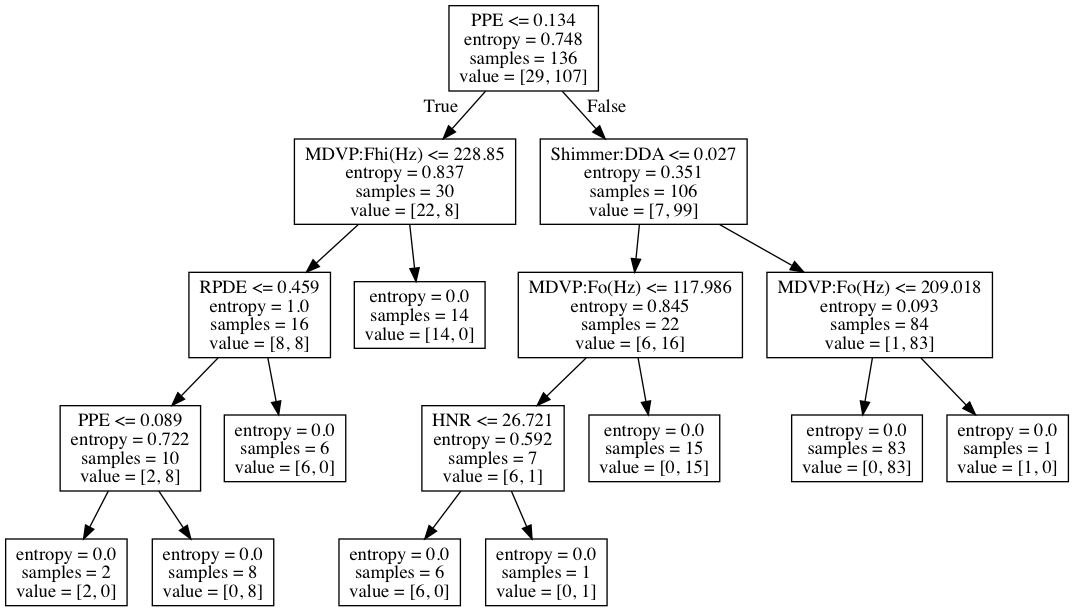

In [7]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Parkinson_File = open('parkinson.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_File, feature_names = list(train_set))

Parkinson_File.close()

system("dot -Tpng parkinson.dot -o parkinson.png")
Image("parkinson.png")

### Testing the model on test data

In [8]:
y_predict = dt_model.predict(test_set)

In [9]:
print(dt_model.score(train_set , train_labels))
print(dt_model.score(test_set , test_labels))

1.0
0.9152542372881356


### Capturing the predicted values and displaying it in a crosstab

In [10]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[16  3]
 [ 2 38]]


### Regularising the Decision Tree

In [11]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
reg_dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

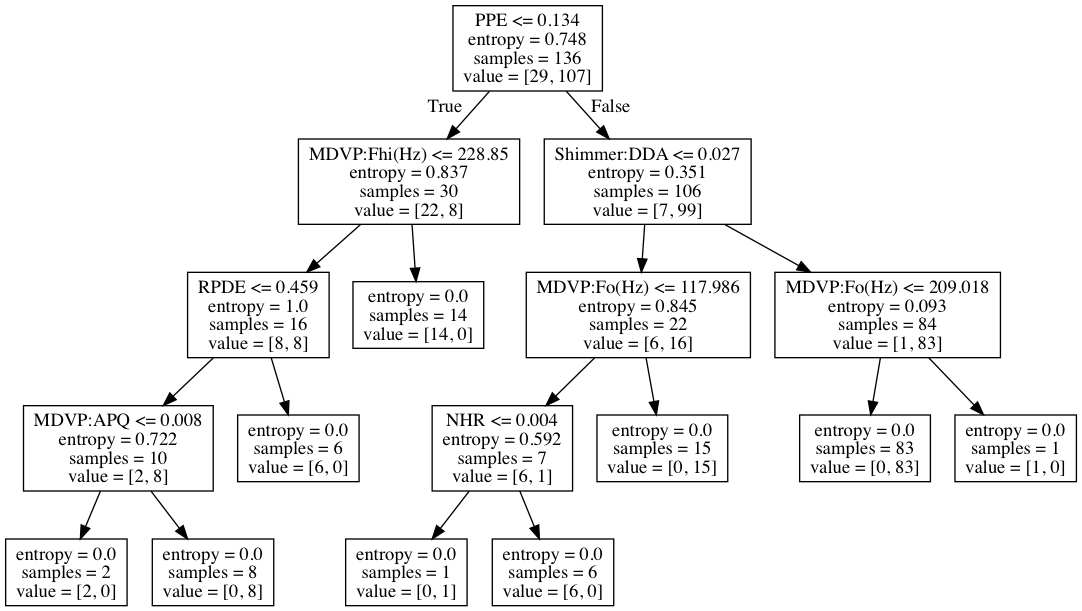

In [12]:
Parkinson_File_reg = open('parkinson_reg.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Parkinson_File_reg, feature_names = list(train_set))

Parkinson_File_reg.close()

system("dot -Tpng parkinson_reg.dot -o parkinson_reg.png")
Image("parkinson_reg.png")

In [13]:
y_predict = reg_dt_model.predict(test_set)

In [14]:
print(reg_dt_model.score(train_set , train_labels))
print(reg_dt_model.score(test_set , test_labels))

1.0
0.8983050847457628


In [15]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[15  4]
 [ 2 38]]
